<a href="https://colab.research.google.com/github/Nami298/Exercise/blob/main/my%20traffic18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive(1).zip to archive(1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("archive(1).zip", 'r') as zip_ref:
    zip_ref.extractall("carla_dataset")


In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
from google.colab import files

📂 لطفا یک تصویر چراغ راهنما آپلود کن...


Saving archive.jpg to archive (1).jpg

🎯 شمارش پیکسل‌های رنگی:
🔴 قرمز: 71
🟡 زرد: 22
🟢 سبز: 4704
❌ خطا در پردازش تصویر: 'NoneType' object has no attribute 'upper'


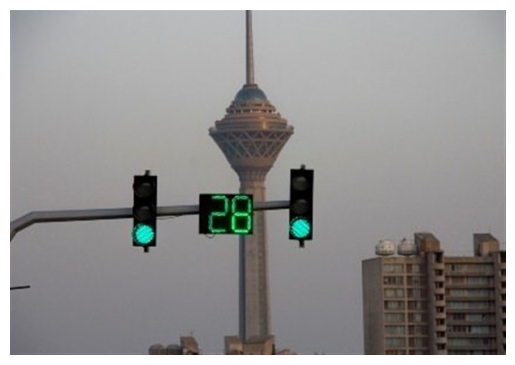

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from io import BytesIO

# --- تابع تشخیص رنگ ---
def detect_traffic_light_color(image_rgb):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # محدوده‌ها برای قرمز
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])

    # محدوده زرد
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([35, 255, 255])

    # محدوده سبز
    lower_green = np.array([40, 50, 50])
    upper_green = np.array([90, 255, 255])

    # ماسک‌ها
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    red_count = cv2.countNonZero(mask_red)
    yellow_count = cv2.countNonZero(mask_yellow)
    green_count = cv2.countNonZero(mask_green)

    print("\n🎯 شمارش پیکسل‌های رنگی:")
    print(f"🔴 قرمز: {red_count}")
    print(f"🟡 زرد: {yellow_count}")
    print(f"🟢 سبز: {green_count}")

    colors = {'red': red_count, 'yellow': yellow_count, 'green': green_count}
    predicted=max(colors,key=colors.get)

# --- آپلود تصویر ---
print("📂 لطفا یک تصویر چراغ راهنما آپلود کن...")
uploaded = files.upload()

# --- پردازش تصویر و نمایش خروجی ---
for filename in uploaded:
    try:
        image = Image.open(BytesIO(uploaded[filename])).convert('RGB')
        image_np = np.array(image)

        color_detected = detect_traffic_light_color(image_np)

        # نمایش تصویر با عنوان
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f"🌈 رنگ تشخیص داده‌شده: {color_detected.upper()}", fontsize=16)
        plt.show()

    except Exception as e:
        print("❌ خطا در پردازش تصویر:", e)
